### A8 - Strings : Question and Answers

💡 **Question 1**

Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.

In [40]:
def minimumDeleteSum(s1, s2):
    m, n = len(s1), len(s2)

    # Initialize the dynamic programming table
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Calculate the LCS length
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + ord(s1[i - 1])
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # Calculate the sum of ASCII values of deleted characters
    ascii_sum = sum(map(ord, s1 + s2)) - 2 * dp[m][n]
    return ascii_sum

# Test the function
s1 = "sea"
s2 = "eat"
result = minimumDeleteSum(s1, s2)
print(result)

231


💡 **Question 2**

Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**  true

In [41]:
def checkValidString(s):
    stack = []
    star_stack = []

    for c in s:
        if c == '(':
            stack.append(c)
        elif c == '*':
            star_stack.append(c)
        elif c == ')':
            if stack:
                stack.pop()
            elif star_stack:
                star_stack.pop()
            else:
                return False

    while stack and star_stack:
        if stack[-1] > star_stack[-1]:
            return False
        stack.pop()
        star_stack.pop()

    return len(stack) == 0

# Test the function
s = "()"
result = checkValidString(s)
print(result)

True


💡 **Question Q3.** 

Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".

In [42]:
def minDistance(word1, word2):
    m = len(word1)
    n = len(word2)

    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize base cases
    for i in range(1, m + 1):
        dp[i][0] = i
    for j in range(1, n + 1):
        dp[0][j] = j

    # Calculate dp[i][j] for all i and j
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]

# Test the function
word1 = "sea"
word2 = "eat"
result = minDistance(word1, word2)
print(result)

2


💡 **Question 4.**

You need to construct a binary tree from a string consisting of parenthesis and integers.

The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root's value and a pair of parenthesis contains a child binary tree with the same structure.
You always start to construct the **left** child node of the parent first if it exists.

**Input:** s = "4(2(3)(1))(6(5))"

**Output:** [4,2,6,3,1,5]

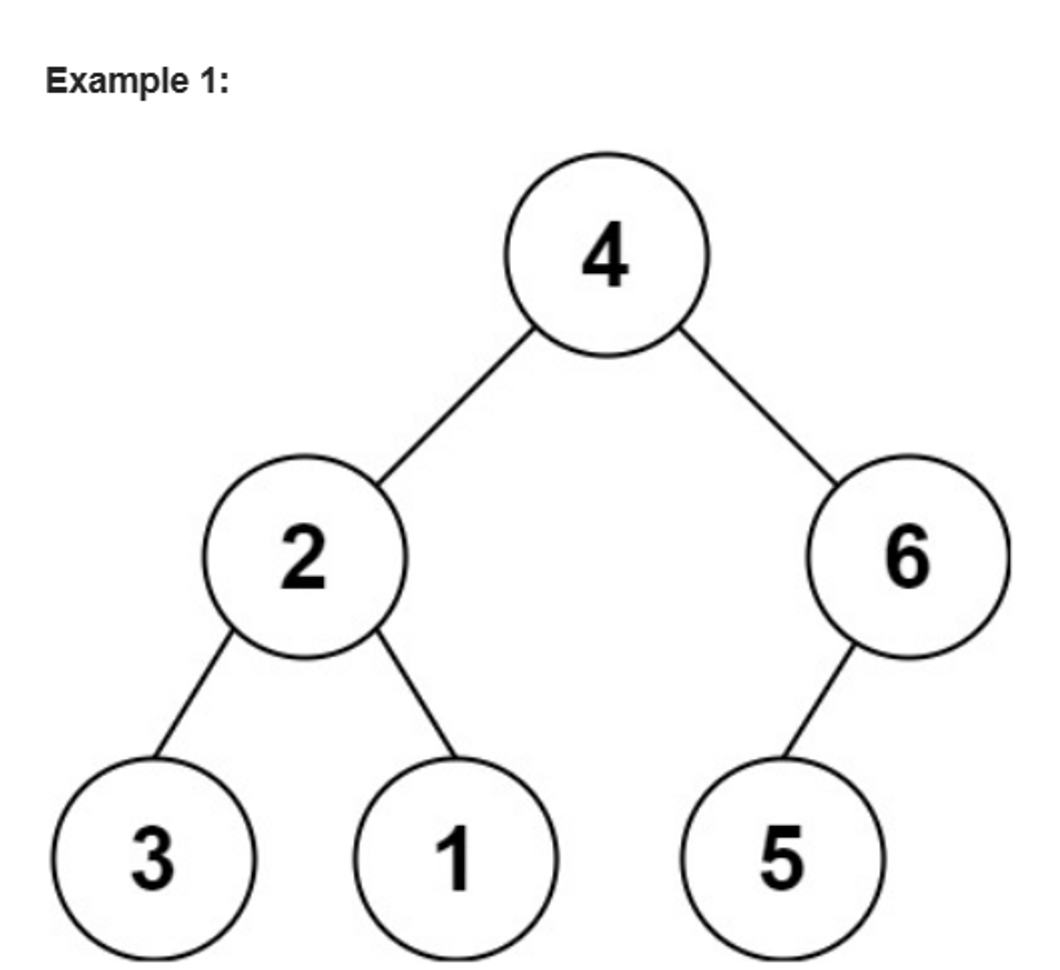

In [53]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def buildTree(s):
    if not s:
        return None

    def get_value(s, i):
        num = 0
        sign = 1
        if s[i] == '-':
            sign = -1
            i += 1
        while i < len(s) and s[i].isdigit():
            num = num * 10 + int(s[i])
            i += 1
        return num * sign, i

    def build_tree_helper(s, i):
        if i >= len(s) or s[i] == ')':
            return None, i + 1

        val, i = get_value(s, i)
        node = TreeNode(val)

        if i < len(s) and s[i] == '(':
            node.left, i = build_tree_helper(s, i + 1)

        if i < len(s) and s[i] == '(':
            node.right, i = build_tree_helper(s, i + 1)

        return node, i + 1

    root, _ = build_tree_helper(s, 0)
    return root


def print_tree(node, indent="", is_right=False):
    if node:
        # Print the current node
        if is_right:
            prefix = indent[:-3] + " └── "
        else:
            prefix = indent[:-3] + " ├── " if indent else ""
        print(prefix + str(node.val))

        # Print the left subtree
        if node.left:
            print_tree(node.left, indent + " │   ", False)

        # Print the right subtree
        if node.right:
            print_tree(node.right, indent + "     ", True)


# Test the function
s = "4(2(3)(1))(6(5))"
root = buildTree(s)

# Print the tree structure
print_tree(root)

4
 │ ├── 2
 │    │ ├── 3
 │      └── 1
   └── 6
      │ ├── 5


💡 **Question 5.** 

Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**  The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".

In [54]:
def compress(chars):
    def count_to_chars(count):
        if count == 1:
            return []
        return list(str(count))
    write = 0
    count = 1

    for i in range(1, len(chars)):
        if chars[i] == chars[i - 1]:
            count += 1
        else:
            chars[write] = chars[i - 1]
            write += 1
            
            count_chars = count_to_chars(count)
            for c in count_chars:
                chars[write] = c
                write += 1
            count = 1

    chars[write] = chars[-1]
    write += 1
    count_chars = count_to_chars(count)
    for c in count_chars:
        chars[write] = c
        write += 1

    return write

# Test the function
chars = ["a", "a", "b", "b", "c", "c", "c"]
new_length = compress(chars)

print(chars[:new_length])

['a', '2', 'b', '2', 'c', '3']


💡 **Question 6.** 

Given two strings s and p, return *an array of all the start indices of* p*'s anagrams in* s. You may return the answer in **any order**.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**

**Input:** s = "cbaebabacd", p = "abc"

**Output:** [0,6]

**Explanation:**

The substring with start index = 0 is "cba", which is an anagram of "abc".

The substring with start index = 6 is "bac", which is an anagram of "abc".

In [55]:
from collections import Counter

def findAnagrams(s, p):
    result = []
    len_s, len_p = len(s), len(p)
    p_count = Counter(p)
    window = Counter(s[:len_p])
    
    if window == p_count:
        result.append(0)
    for i in range(len_p, len_s):
        left_char = s[i - len_p]
        if window[left_char] == 1:
            del window[left_char]
        else:
            window[left_char] -= 1

        right_char = s[i]
        window[right_char] += 1

        if window == p_count:
            result.append(i - len_p + 1)
    return result

# Test the function
s = "cbaebabacd"
p = "abc"
result = findAnagrams(s, p)
print(result)

[0, 6]


💡 **Question 7.** 

Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc"

In [56]:
def decodeString(s):
    stack = []
    curr_str = ""
    curr_num = 0

    for char in s:
        if char.isdigit():
            curr_num = curr_num * 10 + int(char)
        elif char == '[':
            stack.append((curr_str, curr_num))
            curr_str = ""
            curr_num = 0
        elif char == ']':
            prev_str, prev_num = stack.pop()
            curr_str = prev_str + curr_str * prev_num
        else:
            curr_str += char
    return curr_str

# Test the function
s = "3[a]2[bc]"
result = decodeString(s)
print(result)

aaabcbc


💡 **Question 8**

Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.

In [57]:
def buddyStrings(s, goal):
    if len(s) != len(goal):
        return False

    if s == goal:
        seen = set()
        for char in s:
            if char in seen:
                return True
            seen.add(char)
        return False
    mismatched = []
    for i in range(len(s)):
        if s[i] != goal[i]:
            mismatched.append(i)
    return len(mismatched) == 2 and s[mismatched[0]] == goal[mismatched[1]] and s[mismatched[1]] == goal[mismatched[0]]

# Test the function
s = "ab"
goal = "ba"
result = buddyStrings(s, goal)
print(result)

True
